In [163]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import constants
sns.set_context(constants.sns_context)
sns.set_style(constants.sns_style)
data_dir = "/home/cadel/projects/thesis/UNSWThesis/data/completeness"

# Across-genome completeness / agreement with BUSCO

In [164]:
ensembl_stats_df = pd.read_csv(os.path.join(data_dir, "ensembl103.compiled.tsv"), delimiter="\t", index_col="Genome")
ensembl_stats_df

,File,SeqNum,TotLength,MinLength,MaxLength,MeanLength,MedLength,N50Length,L50Count,N50Ctg,...,Species,Assembly,N,Duplicated,Complete,Fragmented,Missing,Class,Order,Family
Genome,,,,,,,,,,,,,,,,,,,,,
Acanthochromis_polyacanthus.ASM210954v1,acanthochromis_polyacanthus/fasta/Acanthochrom...,30414,991584656,500,2466117,32602.9,3423.0,334400,789,12289,...,Acanthochromis polyacanthus,ASM210954v1,255,9,241,2,3,Actinopteri,Actinopteri,Pomacentridae
Accipiter_nisus.Accipiter_nisus_ver1.0,accipiter_nisus/fasta/Accipiter_nisus.Accipite...,44975,1190649881,129,940950,26473.6,5182.0,91241,3562,35057,...,Accipiter nisus,Accipiter_nisus_ver1.0,255,1,233,18,3,NaN,NaN,NaN
Ailuropoda_melanoleuca.ASM200744v2,ailuropoda_melanoleuca/fasta/Ailuropoda_melano...,77287,2444060653,259,212770937,31623.2,937.0,129245720,8,124390,...,Ailuropoda melanoleuca,ASM200744v2,255,13,234,7,1,Mammalia,Carnivora,Ursidae
Amazona_collaria.ASM394721v1,amazona_collaria/fasta/Amazona_collaria.ASM394...,10638,1258720284,615,73408434,118323.0,3026.0,13267695,23,203656,...,Amazona collaria,ASM394721v1,255,19,222,11,3,Aves,Psittaciformes,Psittacidae
Amphilophus_citrinellus.Midas_v5,amphilophus_citrinellus/fasta/Amphilophus_citr...,6637,844902565,891,8593483,127301.9,4445.0,1216136,188,21407,...,Amphilophus citrinellus,Midas_v5,255,4,243,7,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xiphophorus_couchianus.Xiphophorus_couchianus-4.0.1,xiphophorus_couchianus/fasta/Xiphophorus_couch...,25,708396389,12713041,55650406,28335855.6,28402361.0,29398440,11,10684,...,Xiphophorus couchianus,Xiphophorus_couchianus-4.0.1,255,3,203,18,31,Actinopteri,Cyprinodontiformes,Poeciliidae
Xiphophorus_maculatus.X_maculatus-5.0-male,xiphophorus_maculatus/fasta/Xiphophorus_macula...,102,704321165,864,35293739,6905109.5,58815.5,31535491,11,9181372,...,Xiphophorus maculatus,X_maculatus-5.0-male,255,5,246,3,1,Actinopteri,Cyprinodontiformes,Poeciliidae
Zalophus_californianus.mZalCal1.pri,zalophus_californianus/fasta/Zalophus_californ...,42,2408641788,5852,216115662,57348614.0,87739.5,146931682,7,60553473,...,Zalophus californianus,mZalCal1.pri,255,37,215,3,0,Mammalia,Carnivora,Otariidae


In [165]:
def get_completeness_df(deduce_csv, busco_df):
    deduce_df = pd.read_csv(os.path.join(data_dir, deduce_csv))
    deduce_df["alignment"] = deduce_df["alignment"].map(lambda x: x.removesuffix(".dna.toplevel.fa"))
    deduce_df = deduce_df.add_prefix("deduce_")
    deduce_df = deduce_df.set_index("deduce_alignment")
    return deduce_df.join(ensembl_stats_df).dropna()

In [166]:
bej_df = get_completeness_df("deduce_completeness_bej04_100bp.csv", ensembl_stats_df)
ste_df = get_completeness_df("deduce_completeness_ste08_100bp.csv", ensembl_stats_df)

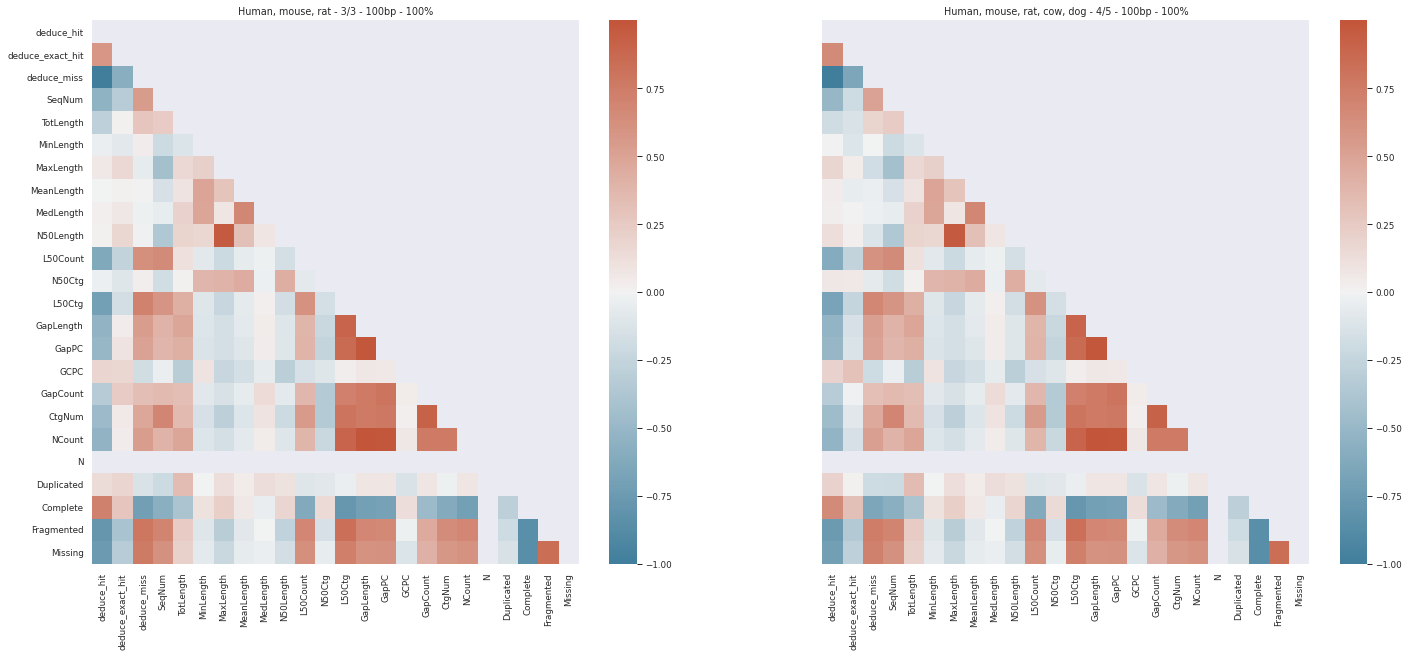

In [167]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(24,10))
ax1.title.set_text("Human, mouse, rat - 3/3 - 100bp - 100%")
ax2.title.set_text("Human, mouse, rat, cow, dog - 4/5 - 100bp - 100%")

drop = ["deduce_mm_min","deduce_mm_max", "deduce_mm_median", "deduce_mm_iqr", "deduce_score_iqr", "deduce_score_min","deduce_score_max", "deduce_score_median", "deduce_score_mean", "deduce_mm_mean", "deduce_mm_sd", "deduce_score_sd",]

interesting_bej_df = bej_df.drop(columns=drop)
interesting_ste_df = ste_df.drop(columns=drop)

mask = np.triu(np.ones_like(interesting_bej_df.corr(), dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(interesting_bej_df.corr(),ax=ax1, mask=mask, cmap=cmap)
sns.heatmap(interesting_ste_df.corr(),ax=ax2, mask=mask, cmap=cmap)
plt.show()

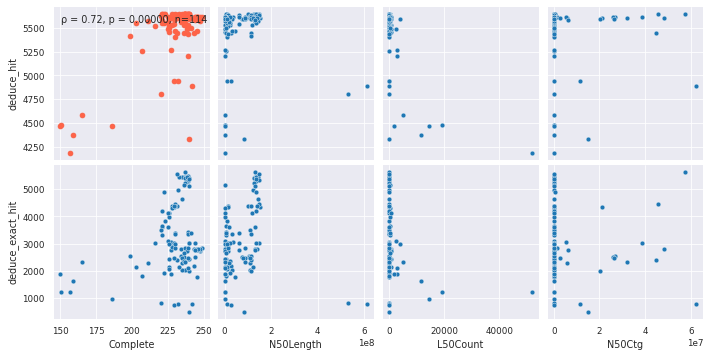

In [168]:
from scipy.stats import pearsonr

def corrfunc(x, y, ax=None, **kws):
    n=len(x)
    r, p = pearsonr(x, y)
    ax = ax or plt.gca()

    
    if abs(r) >= 0.7 and not x.equals(y):
        #pass
        ax.annotate(f'ρ = {r:.2f}, p = {p:.5f}, n={len(x)}', xy=(.05, .9), xycoords=ax.transAxes)

        kws['color'] = 'tomato'

        plt.scatter(x,y,**kws)



# Sample size 114
g = sns.pairplot(data=bej_df, y_vars=["deduce_hit", "deduce_exact_hit"], x_vars=["Complete", "N50Length","L50Count","N50Ctg"])
g.map(corrfunc)
plt.show()




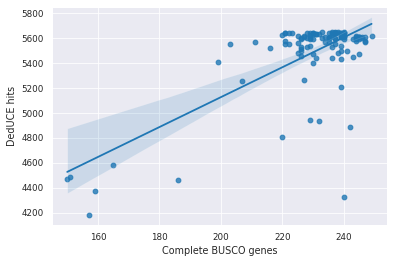

In [169]:
g = sns.regplot(data=bej_df, x="Complete", y="deduce_hit")
g.set_xlabel("Complete BUSCO genes")
g.set_ylabel("DedUCE hits")

g.get_figure().savefig(os.path.join(constants.image_out_dir, "mammaliabusco.pdf"))

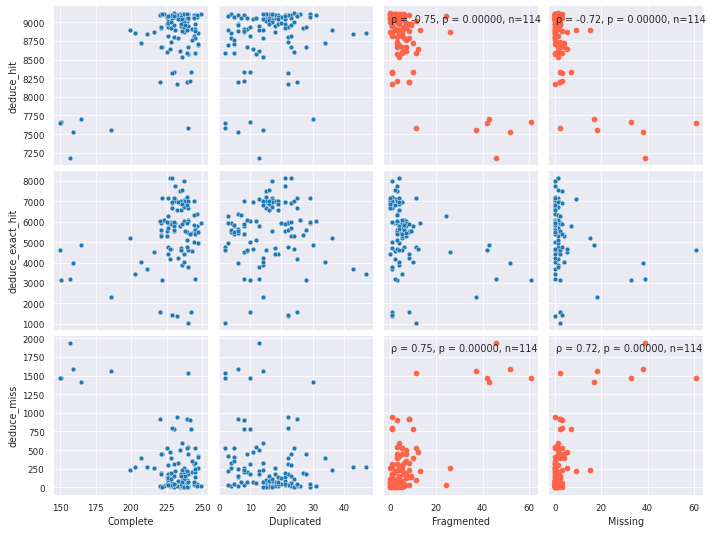

In [170]:
g = sns.pairplot(data=ste_df, y_vars=["deduce_hit", "deduce_exact_hit", "deduce_miss"], x_vars=["Complete", "Duplicated", "Fragmented","Missing"])
g.map(corrfunc)
plt.show()


## Prediction of BUSCO gene count

In [171]:
from sklearn.linear_model import LinearRegression

# X1 is the number of dedUCE hits
# X2 is the number of dedUCE exact hits

# X3 is the % of dedUCE hits
# X4 is the % of dedUCE exact hits

# Y is the BUSCO complete genes

X1 = np.array(bej_df["deduce_hit"]).reshape((-1,1))
X2 = np.array(bej_df["deduce_exact_hit"]).reshape((-1,1))
X = np.hstack((X1,X2))


X3 = np.array(bej_df["deduce_hit"] / (bej_df["deduce_hit"] + bej_df["deduce_miss"])).reshape((-1,1))
X4 = np.array(bej_df["deduce_exact_hit"]/ (bej_df["deduce_hit"] + bej_df["deduce_miss"])).reshape((-1,1))
XP = np.hstack((X3,X4))

Y = np.array(bej_df["Complete"])

model = LinearRegression().fit(X,Y)
model.score(X,Y)

standardised_model = LinearRegression().fit(XP,Y)
standardised_model.score(XP,Y)

0.5400618038520832

# Within-genome completeness

## Data

In [172]:
assemblies = constants.assemblies
excluded = constants.excluded

In [173]:
metadata = pd.read_csv(os.path.join(data_dir, "assemblies.tsv"), delimiter="\t", names=["Iteration", "Organism", "Genome", "Stage", "Tools"])
metadata.Genome = metadata.Genome.map(lambda x: x.replace('.fasta', ''))
metadata

,Iteration,Organism,Genome,Stage,Tools
0,1,starling,step1_svulgaris-10x-550M-sub80.1,Initial assembly,Supernova
1,2,starling,step2_svulgaris-10x-550M-sub80.pri,Tidying,Diploidocus
2,3,starling,step3_scaffolds,Scaffolding,"SLR, SSPACE"
3,4,starling,step4_scaffolds_gapfilled_FINAL,Gapfilling,"LR_GapCloser, GapFinisher"
4,5,starling,step5_L_RNA_scaffolder,Scaffolding,L_RNA_Scaffolder
...,...,...,...,...,...
63,35,tigersnake,tigersnake.v2.19c.gapspanner.gapfill,Gapfilling,Gapspanner
64,36,tigersnake,tigersnake.v2.19d.gapspanner,Gapfilling,Gapspanner
65,37,tigersnake,tigersnake.v2.20.hypo3,Polishing,HyPo
66,38,tigersnake,tigersnake.v2.21a.3d-dna,Scaffolding,3D-DNA


In [174]:
from functools import reduce

buscomp_dfs = []
for assembly in assemblies:
    b = pd.read_csv(os.path.join(data_dir, assembly, "busco", "buscomp.tdt"), delimiter="\t")
    b = b[~(b.Genome.isin(excluded))]
    buscomp_dfs.append(b)

buscomp = reduce(lambda x, acc: pd.concat([x,acc]), buscomp_dfs)
buscomp

,#,Genome,N,Identical,Complete,Single,Duplicated,Fragmented,Partial,Ghost,Missing
0,1,canetoad.v2.2,254,21,229,227,2,12,5,3,5
1,2,canetoad.v3.0.flye,254,19,244,241,3,9,0,1,0
2,3,canetoad.v3.1.tidy,254,18,244,244,0,9,0,1,0
3,4,canetoad.v3.2.hypo,254,19,244,244,0,9,0,1,0
4,5,canetoad.v3.3.arcs,254,19,251,251,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3,4,step4_scaffolds_gapfilled_FINAL,8006,1043,7978,7882,96,23,4,1,0
4,5,step5_L_RNA_scaffolder,8006,1048,7986,7890,96,15,4,1,0
5,6,step6_L_RNA_scaffolder.polished,8006,1054,7986,7890,96,15,4,1,0
6,7,step7_L_RNA_scaffolder.polished.tidy.diploidocus,8006,1054,7985,7968,17,16,4,1,0


In [175]:
busco_dfs = []
for assembly in assemblies:
    b = pd.read_csv(os.path.join(data_dir, assembly, "busco", "busco.tdt"), delimiter="\t")
    b = b.drop(columns=['#', 'Directory', 'Prefix', 'Fasta', 'Sequences', 'Table', 'Description'])
    b = b[~(b.Genome.isin(excluded))]
    busco_dfs.append(b)

busco = reduce(lambda x, acc: pd.concat([x,acc]), busco_dfs)
busco

,Genome,SeqNum,TotLength,MinLength,MaxLength,MeanLength,MedLength,N50Length,L50Count,CtgNum,...,NG50Length,LG50Count,GapLength,GapCount,GC,N,Duplicated,Complete,Fragmented,Missing
0,canetoad.v2.2,31392.0,2.551760e+09,13.0,3525316.0,81286.957155,38587.5,167498.0,3373.0,31392.0,...,74229.0,8039.0,0.0,0.0,43.23,255,3,238,8,6
1,canetoad.v3.0.flye,34646.0,3.565374e+09,108.0,8272080.0,102908.680656,16372.0,451739.0,1843.0,35140.0,...,451739.0,1843.0,49400.0,494.0,43.76,255,5,243,7,0
2,canetoad.v3.1.tidy,22586.0,3.446282e+09,501.0,8272080.0,152584.863987,45808.0,478898.0,1715.0,23068.0,...,451739.0,1843.0,48200.0,482.0,43.74,255,1,247,7,0
3,canetoad.v3.2.hypo,22586.0,3.452657e+09,500.0,8286251.0,152867.149739,45909.0,479469.0,1716.0,22762.0,...,454170.0,1837.0,17600.0,176.0,43.74,255,1,248,6,0
4,canetoad.v3.3.arcs,14471.0,3.453469e+09,500.0,12576705.0,238647.567134,16847.0,1626478.0,547.0,22762.0,...,1550763.0,582.0,829100.0,8291.0,43.74,255,1,251,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,step4_scaffolds_gapfilled_FINAL,7856.0,1.067314e+09,977.0,30547435.0,135859.696538,2433.5,6652296.0,40.0,26531.0,...,6652296.0,40.0,11590274.0,18675.0,41.81,8338,151,7882,73,232
4,step5_L_RNA_scaffolder,7776.0,1.067322e+09,977.0,31181295.0,137258.458848,2395.0,7118366.0,38.0,26531.0,...,7118366.0,38.0,11598274.0,18755.0,41.81,8338,151,7886,72,229
5,step6_L_RNA_scaffolder.polished,7776.0,1.067071e+09,842.0,31169695.0,137226.234568,2394.5,7116007.0,38.0,25946.0,...,7116007.0,38.0,11395574.0,18170.0,41.82,8338,149,7786,96,307
6,step7_L_RNA_scaffolder.polished.tidy.diploidocus,6221.0,1.047748e+09,917.0,31169695.0,168421.081980,2198.0,7615694.0,37.0,23814.0,...,7116007.0,38.0,11158028.0,17593.0,41.73,8338,68,7977,75,218


In [176]:
deduce_dfs = []
for assembly in assemblies:
    d = pd.read_csv(os.path.join(data_dir, assembly, "completeness", "deduce_comp.csv"))
    d = d.drop(columns=["mm_mean", "mm_median", "mm_sd", "mm_min", "mm_max", "mm_iqr", "score_mean", "score_median", "score_sd", "score_min", "score_max", "score_iqr"])
    d.alignment = d.alignment.map(lambda x: x.replace('.fasta', ''))
    d = d[~(d.alignment.isin(excluded))]

    deduce_dfs.append(d)

deduce = reduce(lambda x, acc: pd.concat([x,acc]), deduce_dfs)
deduce

,alignment,hit,exact_hit,miss
0,canetoad.v2.2,62061,13384,34032
1,canetoad.v3.0.flye,62635,13968,33458
2,canetoad.v3.1.tidy,62627,13930,33466
3,canetoad.v3.2.hypo,62983,14042,33110
4,canetoad.v3.3.arcs,62982,14048,33111
...,...,...,...,...
3,step4_scaffolds_gapfilled_FINAL,95973,68413,5949
4,step5_L_RNA_scaffolder,95973,68413,5949
5,step6_L_RNA_scaffolder.polished,96004,68465,5918
6,step7_L_RNA_scaffolder.polished.tidy.diploidocus,96002,68484,5920


In [177]:
assembly_data = pd.merge(metadata, buscomp, how="outer", left_on="Genome", right_on="Genome")

assembly_data = pd.merge(assembly_data, busco, how="outer", left_on="Genome", right_on="Genome", suffixes=(None, "_busco"))
assembly_data = pd.merge(assembly_data, deduce, how="outer", left_on="Genome", right_on="alignment",suffixes=(None, "_deduce"))
assembly_data.Stage = assembly_data.Stage.astype('category')
#assemblies.version = assemblies.version.astype('int')

#assembly_data = assembly_data[~assembly_data.Iteration.isna()]
assembly_data = assembly_data[~(assembly_data.Genome.isin(excluded))]
#assembly_data = assembly_data[(~assembly_data.Complete.isna()) & (~assembly_data.Complete_busco.isna()) & (~assembly_data.hit.isna())]

assembly_data.to_csv(os.path.join(data_dir, "summarised.csv"))
#assembly_data[assembly_data.Missing_busco.isna()]


In [178]:
#assembly_data[assembly_data.Organism == "starling"][["Stage", "Tools", "Complete", "Complete_busco", "Duplicated", "deduce_complete", "deduce_homologous","deduce_hit"]]

## Analysis

### How well do various measures correlate within-genome?

In [179]:
from scipy.stats import pearsonr
def corrfunc(x, y, ax=None, **kws):
    n=len(x)
    r, p = pearsonr(x, y)
    ax = ax or plt.gca()

    
    if p < 0.001 and abs(r) >= 0.7 and not x.equals(y):
        #pass
        ax.annotate(f'ρ = {r:.2f}, p = {p:.5f}', xy=(.05, .9), xycoords=ax.transAxes)
        kws['color'] = 'tomato'
        plt.scatter(x,y,**kws)


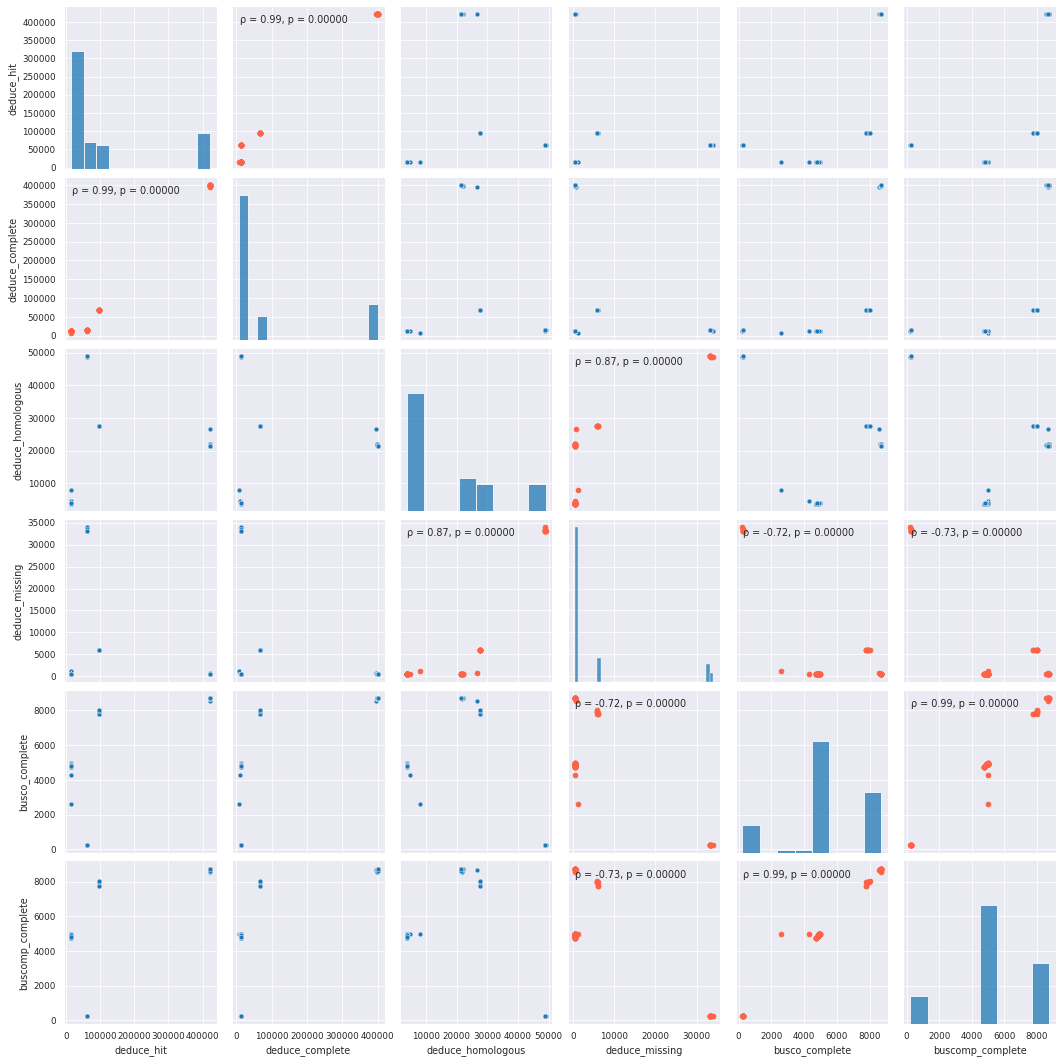

In [180]:
assembly_data["deduce_hit_%"] = assembly_data["hit"] / (assembly_data["hit"] + assembly_data["miss"])
assembly_data["deduce_exact_%"] = assembly_data["exact_hit"] / (assembly_data["hit"] + assembly_data["miss"])
assembly_data["deduce_exact_missing_%"] = 1 - assembly_data["deduce_exact_%"]
assembly_data["buscomp_complete_%"] = assembly_data["Complete"] / (assembly_data["N"])
assembly_data["busco_complete_%"] = assembly_data["Complete_busco"] / (assembly_data["N_busco"])
assembly_data["busco_missing_%"] = assembly_data["Missing_busco"] / (assembly_data["N_busco"])
assembly_data["exact_complete_diff"] = assembly_data["deduce_exact_%"] - assembly_data["busco_complete_%"]

assembly_data["deduce_hit"] = assembly_data["hit"]
assembly_data["deduce_total"] = assembly_data["hit"] + assembly_data["miss"]
assembly_data["deduce_complete"] = assembly_data["exact_hit"]
assembly_data["deduce_homologous"] = assembly_data["hit"] - assembly_data["exact_hit"]
assembly_data["deduce_missing"] = assembly_data["miss"]
assembly_data["deduce_complete_%"] = assembly_data["deduce_complete"] / assembly_data["deduce_total"]
assembly_data["deduce_homologous_%"] = assembly_data["deduce_homologous"] / assembly_data["deduce_total"]
assembly_data["deduce_missing_%"] = assembly_data["deduce_missing"] / assembly_data["deduce_total"]

assembly_data["busco_complete"] = assembly_data["Complete_busco"]
assembly_data["buscomp_complete"] = assembly_data["Complete"]


#corr_vars = ["deduce_hit_%", "deduce_exact_%", "busco_complete_%", "buscomp_complete_%"]
corr_vars = ["deduce_hit", "deduce_complete", "deduce_homologous", "deduce_missing", "busco_complete", "buscomp_complete"]
in_g = sns.pairplot(data=assembly_data, y_vars=corr_vars, x_vars=corr_vars)
in_g.map(corrfunc)

## All assemblies

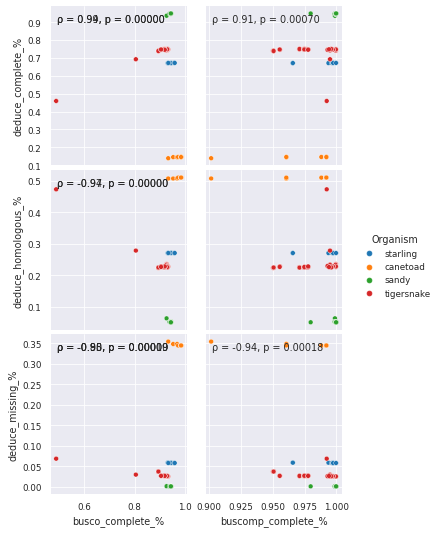

In [181]:
def c(x, y, ax=None, **kws):
    n=len(x)
    r, p = pearsonr(x, y)
    ax = ax or plt.gca()

    #print(x)
    if p < 0.001 and abs(r) >= 0.7 and not x.equals(y):
        #pass
        ax.annotate(f'ρ = {r:.2f}, p = {p:.5f}', xy=(.05, .9), xycoords=ax.transAxes)
        #kws['color'] = 'tomato'
        #plt.scatter(x,y,**kws)

cg = sns.pairplot(data=assembly_data, y_vars=["deduce_complete_%", "deduce_homologous_%", "deduce_missing_%"], x_vars=["busco_complete_%", "buscomp_complete_%"], hue="Organism")
cg.map(c)
#cg.axes[0]





canetoad (n=9)
deduce_complete_% busco_complete_%: 0.86 (0.00276)
deduce_complete_% buscomp_complete_%: 0.91 (0.00070)
deduce_homologous_% busco_complete_%: 0.87 (0.00259)
deduce_homologous_% buscomp_complete_%: 0.77 (0.01610)
deduce_hit_% busco_complete_%: 0.95 (0.00009)
deduce_hit_% buscomp_complete_%: 0.94 (0.00018)


tigersnake (n=39)
deduce_complete_% busco_complete_%: 0.99 (0.00000)
deduce_complete_% buscomp_complete_%: -0.11 (0.51655)
deduce_homologous_% busco_complete_%: -0.97 (0.00000)
deduce_homologous_% buscomp_complete_%: 0.19 (0.24916)
deduce_hit_% busco_complete_%: 0.90 (0.00000)
deduce_hit_% buscomp_complete_%: 0.33 (0.03774)


sandy (n=12)
deduce_complete_% busco_complete_%: 0.94 (0.00000)
deduce_complete_% buscomp_complete_%: -0.13 (0.69047)
deduce_homologous_% busco_complete_%: -0.94 (0.00000)
deduce_homologous_% buscomp_complete_%: 0.13 (0.69360)
deduce_hit_% busco_complete_%: 0.88 (0.00019)
deduce_hit_% buscomp_complete_%: -0.17 (0.60194)


starling (n=8)
deduce_c

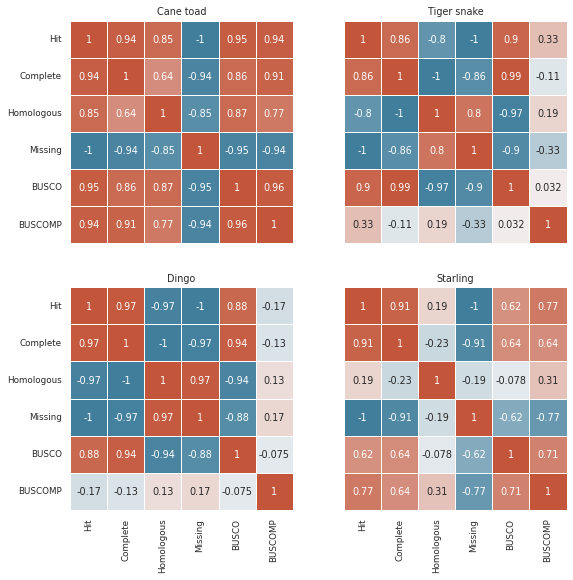

In [182]:
import itertools

nicenames= {
    "sandy": "Dingo",
    "canetoad": "Cane toad",
    "tigersnake": "Tiger snake",
    "starling": "Starling"
}

#mask = np.triu(np.ones_like(corr, dtype=bool))
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(9, 9))

print_c_vars = ["deduce_complete_%","deduce_homologous_%", "deduce_hit_%"]
print_oc_vars = ["busco_complete_%", "buscomp_complete_%"]

for assembly,ax in zip(assemblies, [ax1,ax2,ax3,ax4]):
    print("\n")
    print(f"{assembly} (n={len(assembly_data[assembly_data.Organism == assembly])})")
    for x,y in itertools.product(print_c_vars, print_oc_vars):
        rho, p = pearsonr(assembly_data[assembly_data.Organism == assembly][x],assembly_data[assembly_data.Organism == assembly][y])
        print(f"{x} {y}: {rho:.2f} ({p:.5f})")
        
    corr = assembly_data[assembly_data.Organism == assembly][["deduce_hit_%", "deduce_complete_%", "deduce_homologous_%", "deduce_missing_%", "busco_complete_%", "buscomp_complete_%"]].corr()

    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    ax.set_title(nicenames[assembly])
    sns.heatmap(corr, ax=ax, cmap=cmap, center=0,
                square=True,
                linewidths=.5, cbar=False, cbar_kws={"shrink": .5}, annot=True,
                xticklabels=(ax in [ax3,ax4]),
                yticklabels=(ax in [ax1,ax3]))
    
    if ax in [ax1,ax3]:
        ax.set_yticklabels(["Hit", "Complete", "Homologous", "Missing", "BUSCO", "BUSCOMP"])
    if ax in [ax3,ax4]:
        ax.set_xticklabels(["Hit", "Complete", "Homologous", "Missing", "BUSCO", "BUSCOMP"])
f.savefig(os.path.join(constants.image_out_dir, "comp_corr.pdf"))

## Cane toad

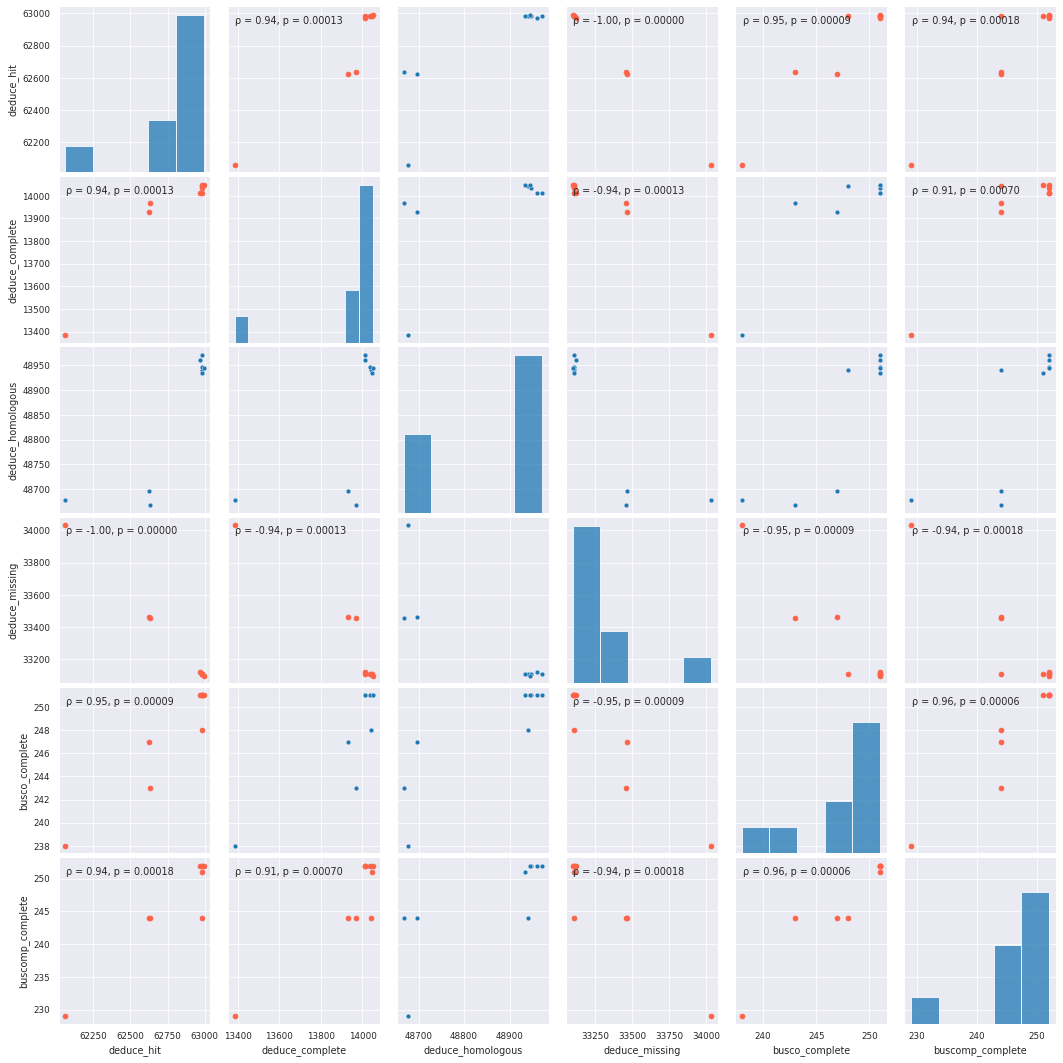

In [183]:
# Cane toad
cg = sns.pairplot(data=assembly_data[assembly_data.Organism=="canetoad"], y_vars=corr_vars, x_vars=corr_vars)
cg.map(corrfunc)

## Dingo

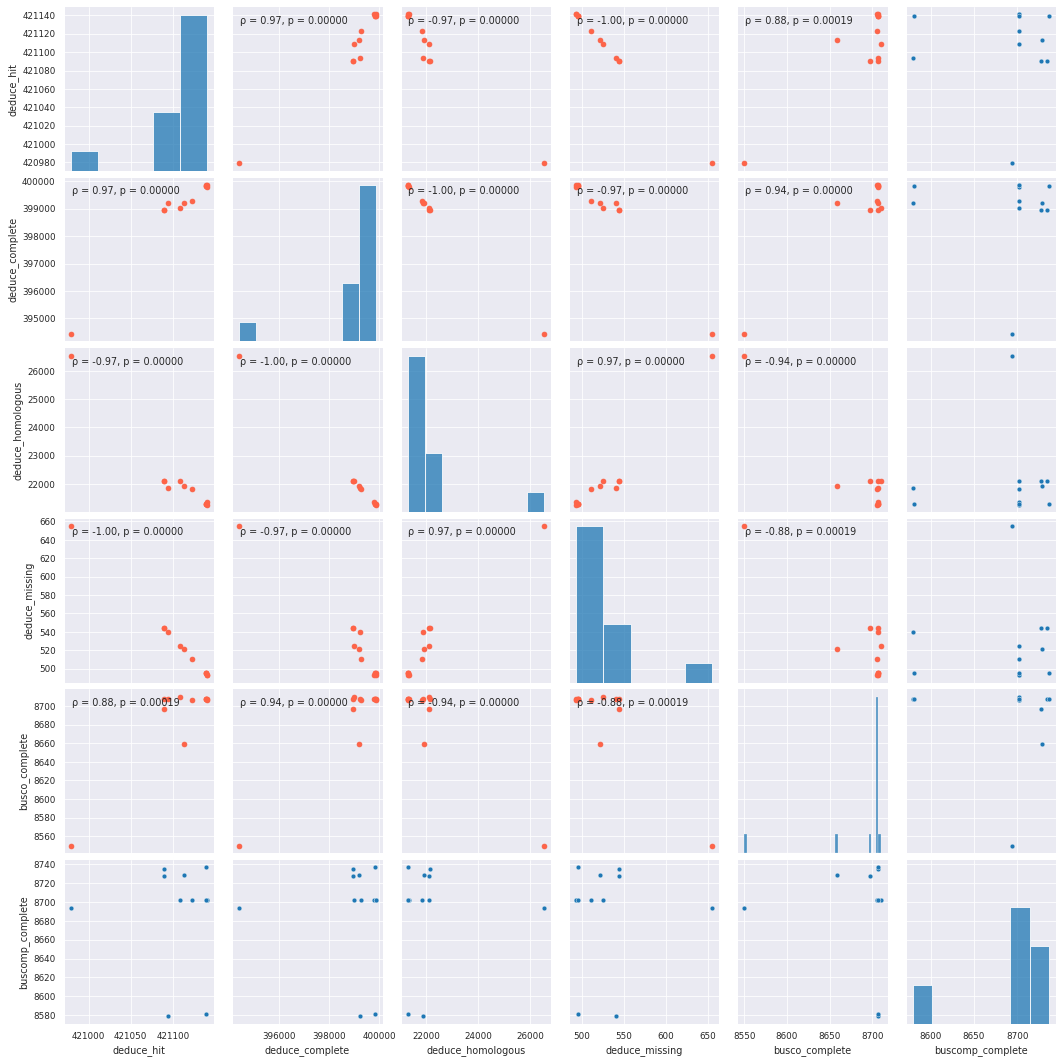

In [184]:
sd = sns.pairplot(data=assembly_data[assembly_data.Organism=="sandy"], y_vars=corr_vars, x_vars=corr_vars)
sd.map(corrfunc)

## Tiger snake

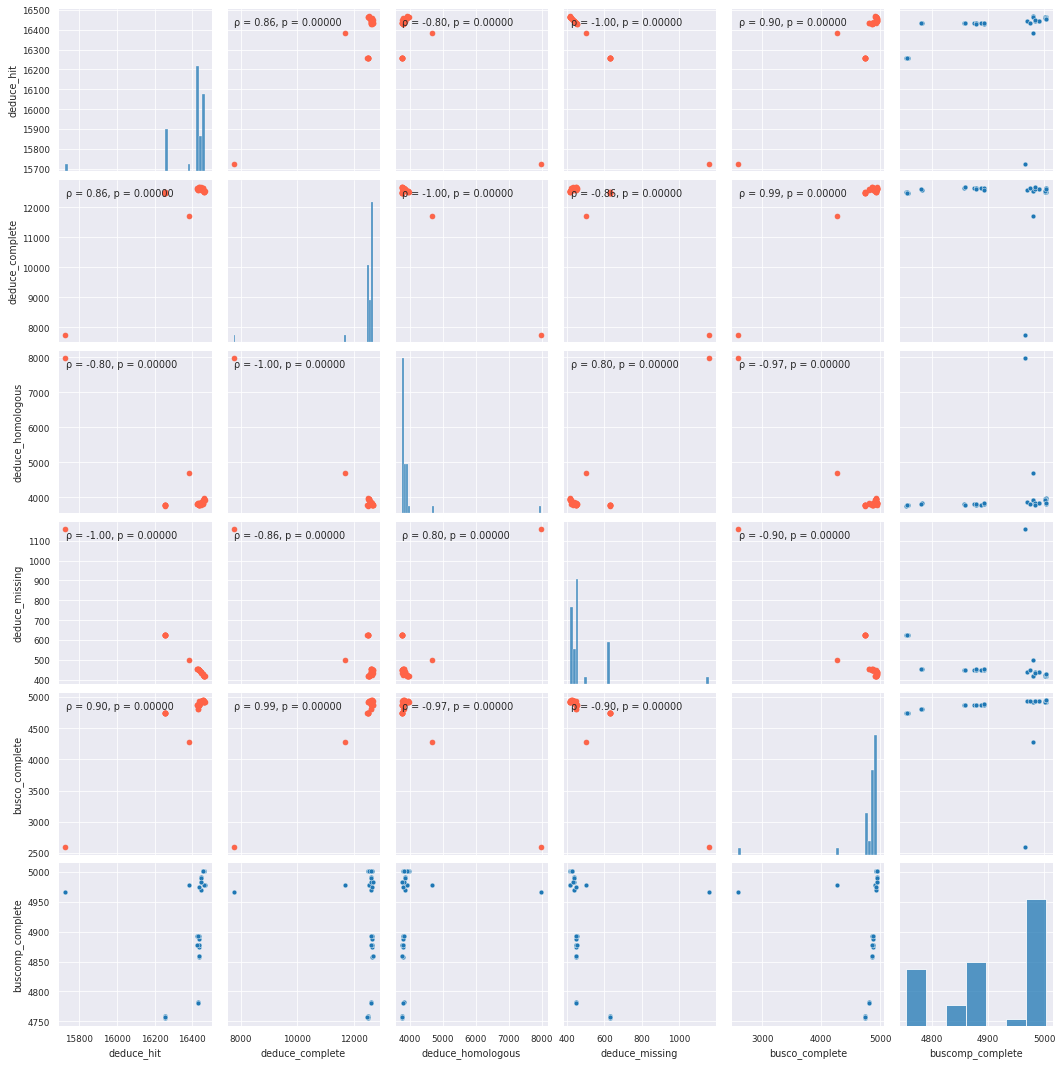

In [185]:
sd = sns.pairplot(data=assembly_data[assembly_data.Organism=="tigersnake"], y_vars=corr_vars, x_vars=corr_vars)
sd.map(corrfunc)

## Starling

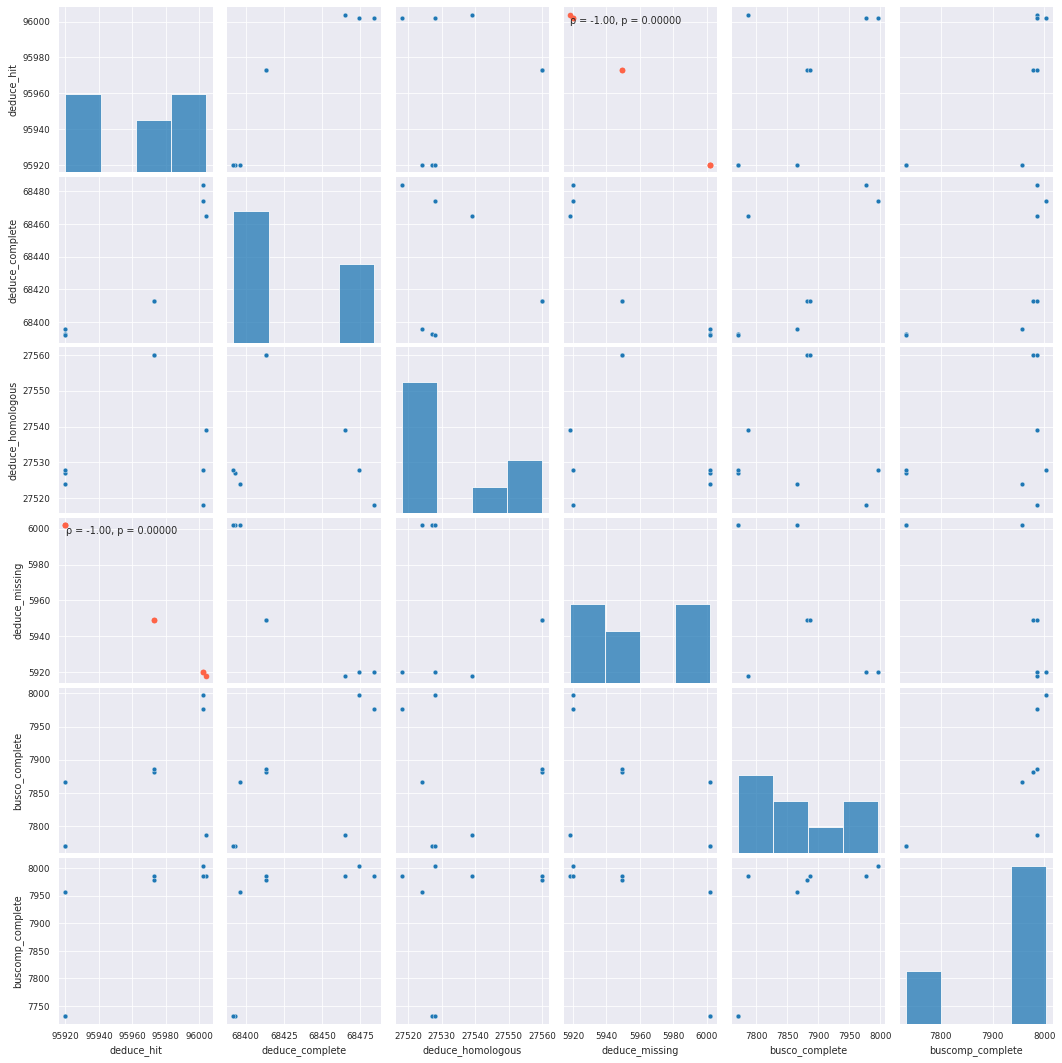

In [186]:
sd = sns.pairplot(data=assembly_data[assembly_data.Organism=="starling"], y_vars=corr_vars, x_vars=corr_vars)
sd.map(corrfunc)

## Tiger snake, but fancy

Text(0.5, 386.1041666666666, 'BUSCOMP')

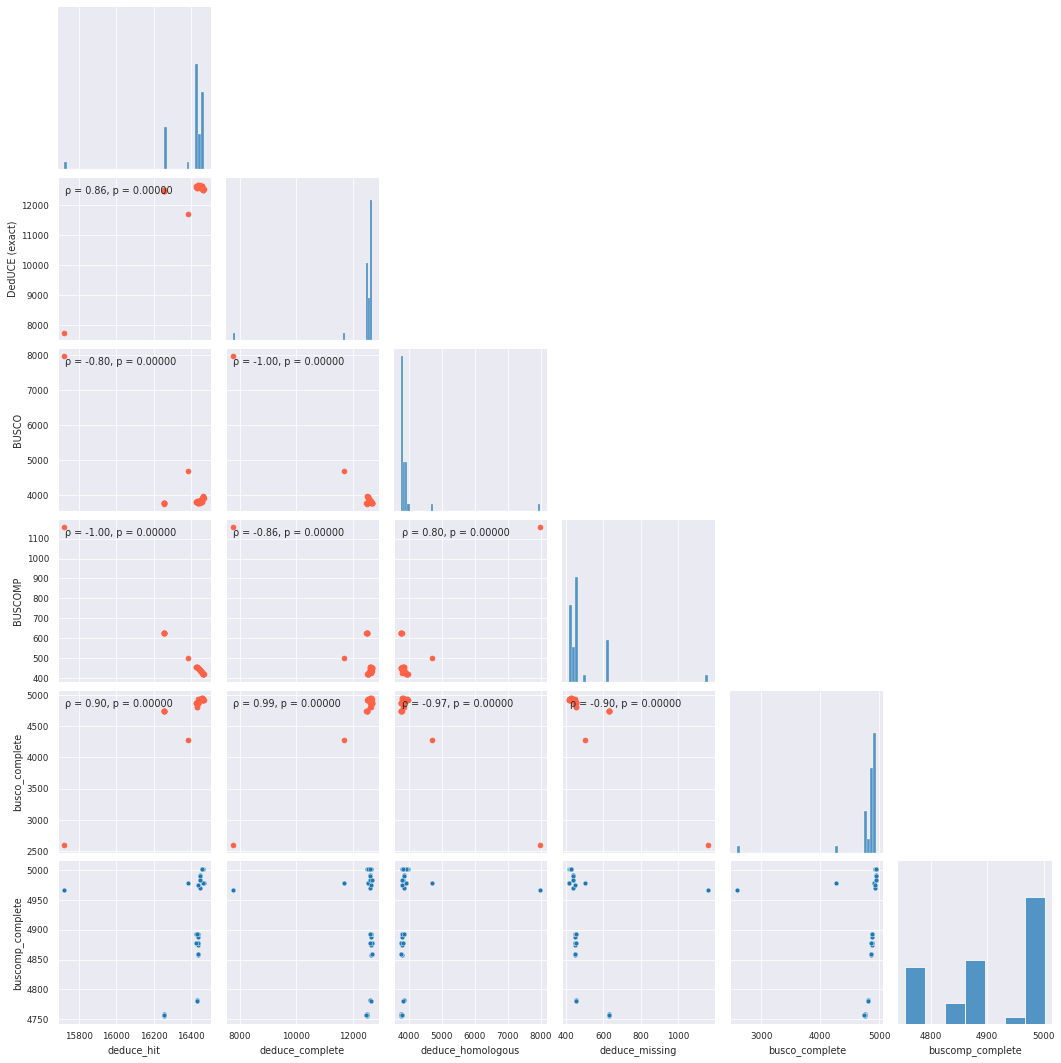

In [187]:
ts = sns.pairplot(data=assembly_data[assembly_data.Organism=="tigersnake"], corner=True, y_vars=corr_vars, x_vars=corr_vars)
ts.map_offdiag(corrfunc)

ts.axes[0][0].set_ylabel("DedUCE (hit)")
ts.axes[1][0].set_ylabel("DedUCE (exact)")
ts.axes[2][0].set_ylabel("BUSCO")
ts.axes[3][0].set_ylabel("BUSCOMP")

ts.axes[3][0].set_xlabel("DedUCE (hit)")
ts.axes[3][1].set_xlabel("DedUCE (exact)")
ts.axes[3][2].set_xlabel("BUSCO")
ts.axes[3][3].set_xlabel("BUSCOMP")

#ts.savefig(os.path.join(constants.image_out_dir, "tigersnakecorr.pdf"))

# Nice plots

In [202]:
agg_data = assembly_data.melt(id_vars=['Iteration', 'Organism', 'Genome', 'Stage', 'Tools'])
agg_data = agg_data[agg_data.variable.isin(["exact_complete_diff", "Complete_busco","Missing_busco", "Complete", "Identical", "buscomp_complete_%","busco_complete_%","busco_missing_%", "deduce_hit_%","deduce_exact_missing_%","deduce_homologous", "deduce_complete","deduce_hit","deduce_missing", "deduce_missing"])]

agg_data
# tsplot = sns.relplot(data=agg_data[agg_data.Organism == "tigersnake"], x="Iteration", y="value", hue="variable", kind="line",height=8.27, aspect=2)
# tsplot.set_axis_labels("Iteration", "Completeness")
# tsplot._legend.set_title("")
# tsplot._legend.texts[0].set_text("DedUCE")
# tsplot._legend.texts[1].set_text("BUSCOMP")
# tsplot._legend.texts[2].set_text("BUSCO")
#tsplot.savefig(os.path.join(constants.image_out_dir, "tigersnakecomp.pdf"))

,Iteration,Organism,Genome,Stage,Tools,variable,value
136,1,starling,step1_svulgaris-10x-550M-sub80.1,Initial assembly,Supernova,Identical,1032
137,2,starling,step2_svulgaris-10x-550M-sub80.pri,Tidying,Diploidocus,Identical,1032
138,3,starling,step3_scaffolds,Scaffolding,"SLR, SSPACE",Identical,1039
139,4,starling,step4_scaffolds_gapfilled_FINAL,Gapfilling,"LR_GapCloser, GapFinisher",Identical,1043
140,5,starling,step5_L_RNA_scaffolder,Scaffolding,L_RNA_Scaffolder,Identical,1048
...,...,...,...,...,...,...,...
3191,35,tigersnake,tigersnake.v2.19c.gapspanner.gapfill,Gapfilling,Gapspanner,deduce_missing,456
3192,36,tigersnake,tigersnake.v2.19d.gapspanner,Gapfilling,Gapspanner,deduce_missing,456
3193,37,tigersnake,tigersnake.v2.20.hypo3,Polishing,HyPo,deduce_missing,452
3194,38,tigersnake,tigersnake.v2.21a.3d-dna,Scaffolding,3D-DNA,deduce_missing,452


,Iteration,Organism,Genome,Stage,Tools,variable,value
3000,1,canetoad,canetoad.v2.2,Assembly,"Abyss, DBG2OLC, Pilon, Arrow",deduce_complete,13384
3001,2,canetoad,canetoad.v3.0.flye,Assembly,Flye,deduce_complete,13968
3002,3,canetoad,canetoad.v3.1.tidy,Tidying,Diploidocus,deduce_complete,13930
3003,4,canetoad,canetoad.v3.2.hypo,Polishing,HyPo,deduce_complete,14042
3004,5,canetoad,canetoad.v3.3.arcs,Scaffolding,ARCS,deduce_complete,14048
3005,6,canetoad,canetoad.v3.4.sspace,Scaffolding,SSPACe,deduce_complete,14011
3006,7,canetoad,canetoad.v3.5.gapfinisher,Gapfilling,Gapfinisher,deduce_complete,14035
3007,8,canetoad,canetoad.v3.6.hypo,Polishing,HyPo,deduce_complete,14049
3008,9,canetoad,canetoad.v3.7.tidy,Tidying,Diploidocus,deduce_complete,14011


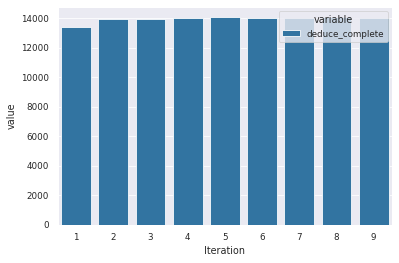

In [189]:
uce_cats = [
    #"deduce_homologous",
    "deduce_complete",
    #"deduce_missing"
]

sns.barplot(data=agg_data[(agg_data.Organism=="canetoad") & (agg_data.variable.isin(uce_cats))], x="Iteration", y="value", hue="variable")
agg_data[(agg_data.Organism=="canetoad") & (agg_data.variable.isin(uce_cats))]

In [221]:
from IPython.display import display
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10):
    display(assembly_data[["Genome","N50Length", "L50Count"]]) #need display to show the dataframe when using with in jupyter



,Genome,N50Length,L50Count
0,step1_svulgaris-10x-550M-sub80.1,1756637.0,147.0
1,step2_svulgaris-10x-550M-sub80.pri,1764435.0,146.0
2,step3_scaffolds,7118373.0,39.0
3,step4_scaffolds_gapfilled_FINAL,6652296.0,40.0
4,step5_L_RNA_scaffolder,7118366.0,38.0
5,step6_L_RNA_scaffolder.polished,7116007.0,38.0
6,step7_L_RNA_scaffolder.polished.tidy.diploidocus,7615694.0,37.0
7,step8_pseudochromosomes,72525610.0,5.0
8,canetoad.v2.2,167498.0,3373.0
9,canetoad.v3.0.flye,451739.0,1843.0


## Hits vs. BUSCOMP

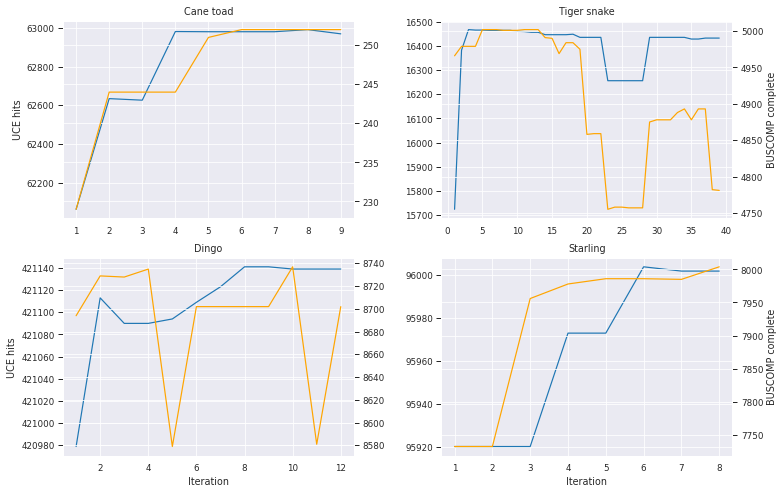

In [216]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(12, 8))
#fig.tight_layout(w_pad=7.5, h_pad=2.0)
fig.subplots_adjust(wspace = 0.3)

axes = [ax1,ax2,ax3,ax4]
twins = [ax.twinx() for ax in axes]

for i, assembly in zip(range(len(axes)), assemblies):
    sns.lineplot(ax=axes[i], data=agg_data[(agg_data.Organism==assembly) & (agg_data.variable == "deduce_hit")], x="Iteration", y="value")
    sns.lineplot(ax=twins[i], data=agg_data[(agg_data.Organism==assembly) & (agg_data.variable == "Complete")], x="Iteration", y="value",color="orange")

    axes[i].set_title(nicenames[assembly])
    
    if i in [0,2]:
        axes[i].set_ylabel("UCE hits")
    else:
        axes[i].set_ylabel("")

    if i in [1,3]:
        twins[i].set_ylabel("BUSCOMP complete")
    else:
        twins[i].set_ylabel("")

    if i in [0,1]:
        axes[i].set_xlabel("")

fig.savefig(os.path.join(constants.image_out_dir, "hits_vs_buscomp.pdf"))

## Exact hits vs. BUSCO

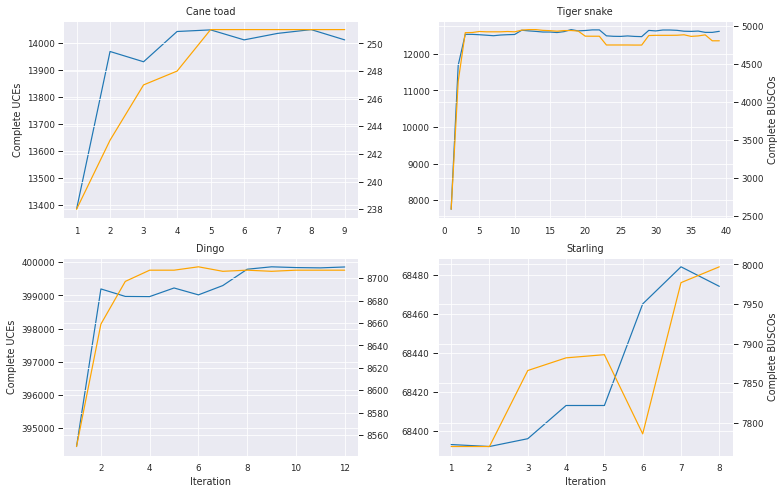

In [214]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(12, 8))
#fig.tight_layout(w_pad=7.5, h_pad=2.0)
fig.subplots_adjust(wspace = 0.27)
axes = [ax1,ax2,ax3,ax4]
twins = [ax.twinx() for ax in axes]

for i, assembly in zip(range(len(axes)), assemblies):
    sns.lineplot(ax=axes[i], data=agg_data[(agg_data.Organism==assembly) & (agg_data.variable == "deduce_complete")], x="Iteration", y="value")
    sns.lineplot(ax=twins[i], data=agg_data[(agg_data.Organism==assembly) & (agg_data.variable == "Complete_busco")], x="Iteration", y="value",color="orange")

    axes[i].set_title(nicenames[assembly])
    
    if i in [0,2]:
        axes[i].set_ylabel("Complete UCEs")
    else:
        axes[i].set_ylabel("")

    if i in [1,3]:
        twins[i].set_ylabel("Complete BUSCOs")
    else:
        twins[i].set_ylabel("")

    if i in [0,1]:
        axes[i].set_xlabel("")

fig.savefig(os.path.join(constants.image_out_dir, "exact_vs_busco.pdf"))

In [192]:
set(metadata["Stage"])

{'Assembly',
 'Fixing',
 'Gapfilling',
 'Initial assembly',
 'Mapping',
 'Polishing',
 'Reduction',
 'Scaffolding',
 'Tidying'}

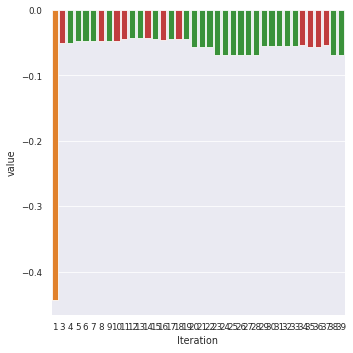

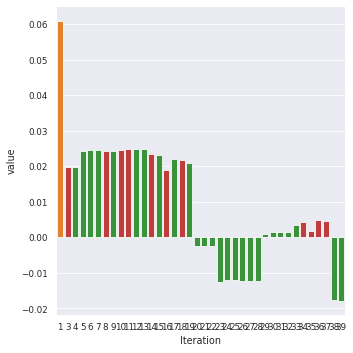

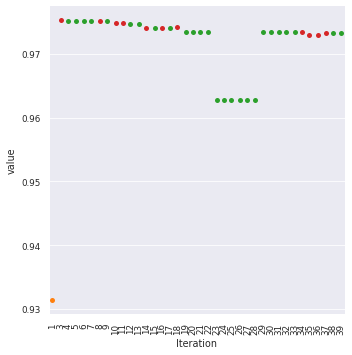

In [193]:
assembly_data["diff_busco"] = assembly_data["busco_complete_%"] - assembly_data["deduce_hit_%"]
assembly_data["diff_buscomp"] = assembly_data["buscomp_complete_%"] - assembly_data["deduce_hit_%"]

agg_data = assembly_data[assembly_data.Organism == "tigersnake"].melt(id_vars=['Iteration', 'Organism', 'Genome', 'Stage', 'Tools'])

colour_map = {'Assembly': 'C9', 'Initial assembly': 'C8', 'Mapping': 'C7', 'Gapfilling': 'C6', 'Fixing': 'C5', 'Polishing': 'C4', 'Reduction': 'C3', 'Scaffolding': 'C1', 'Tidying': 'C2'}
# C1: assembly
# C2: scaffolding / fixing / reduction / tidying
# C3: polishing / gapfilling / mapping
simple_colour_map = {'Assembly': 'C1', 'Initial assembly': 'C1', 'Mapping': 'C2', 'Gapfilling': 'C3', 'Fixing': 'C2', 'Polishing': 'C3', 'Reduction': 'C2', 'Scaffolding': 'C2', 'Tidying': 'C2'}

palette = {}
for row in agg_data.to_records():
    palette[row[1]] = simple_colour_map[row[4]]
sns.catplot(data=agg_data[(agg_data.Iteration != 2.0) & (agg_data.variable=="diff_busco")], x="Iteration", y="value", kind="bar", palette=palette)
sns.catplot(data=agg_data[(agg_data.Iteration != 2.0)  & (agg_data.variable=="diff_buscomp")] , x="Iteration", y="value", kind="bar", palette=palette)

# scaffolding green, polishing red
i= sns.catplot(data=agg_data[(agg_data.Iteration != 2.0) & (agg_data.variable=="deduce_hit_%")], x="Iteration", y="value",  palette=palette)
for ax in i.axes.flat:ax.tick_params(axis='x', rotation=90)


### How does the dedUCE score change depending on operation?


/tmp/ipykernel_6774/3885019289.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiger_snake['hit_diff'] = tiger_snake['hit'].diff()
/tmp/ipykernel_6774/3885019289.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiger_snake['exact_diff'] = tiger_snake['exact_hit'].diff()


3.0
0.0
817.0
10.157894736842104


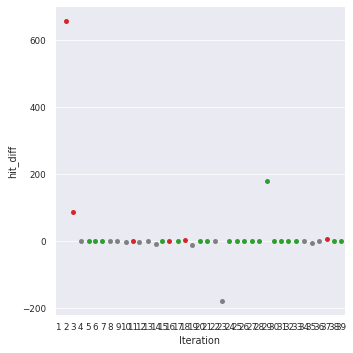

In [194]:
just_deduce = pd.merge(metadata, deduce, how="outer", left_on="Genome", right_on="alignment")

just_deduce.Stage = just_deduce.Stage.astype('category')
#assemblies.version = assemblies.version.astype('int')

just_deduce = just_deduce[~just_deduce.Iteration.isna()]
just_deduce = just_deduce[~(just_deduce.Genome.isin(excluded))]

tiger_snake = just_deduce[just_deduce.Organism == "tigersnake"]
tiger_snake['hit_diff'] = tiger_snake['hit'].diff()
tiger_snake['exact_diff'] = tiger_snake['exact_hit'].diff()

simple_colour_map = {'Assembly': 'C1', 'Initial assembly': 'C1', 'Mapping': 'grey', 'Gapfilling': 'grey', 'Fixing': 'grey', 'Polishing': 'C3', 'Reduction': 'grey', 'Scaffolding': 'C2', 'Tidying': 'grey'}

palette = {}
for row in tiger_snake.to_records():
    palette[row[1]] = simple_colour_map[row[4]]

g=sns.catplot(data=tiger_snake, x="Iteration", y="hit_diff", palette=palette)

print(tiger_snake[tiger_snake.Stage == "Polishing"]["hit_diff"].median())
print(tiger_snake[tiger_snake.Stage == "Scaffolding"]["hit_diff"].median())
print(tiger_snake[tiger_snake.Stage == "Polishing"]["exact_diff"].mean())
print(tiger_snake[tiger_snake.Stage == "Scaffolding"]["exact_diff"].mean())

In [195]:
# scaf_pol = just_deduce.copy()
# #scaf_pol['hit_diff'] = tiger_snake['hit'].diff()
# scaf_pol["exact_ratio"] = scaf_pol["exact_hit"] / scaf_pol["hit"]
# scaf_pol["hit_%"] = scaf_pol["hit"] / (scaf_pol["hit"] + scaf_pol["miss"])
# scaf_pol['hit_diff'] = scaf_pol.groupby(['Organism'])['hit'].transform(lambda x: x.diff()) 
# scaf_pol['hit_perc_diff'] = scaf_pol.groupby(['Organism'])['hit_%'].transform(lambda x: x.diff()) 

# scaf_pol['exact_diff'] = scaf_pol.groupby(['Organism'])['exact_hit'].transform(lambda x: x.diff()) 
# scaf_pol['ratio_diff'] = scaf_pol.groupby(['Organism'])['exact_ratio'].transform(lambda x: x.diff()) 
# #scaf_pol = scaf_pol[scaf_pol.Stage.isin(["Scaffolding", "Polishing"])]
# #scaf_pol["Stage"] = scaf_pol["Stage"].map(lambda s: s if s in ["Scaffolding", "Polishing"] else "_" + s)
# #sns.displot(data=scaf_pol, hue="Stage", x="hit_diff", rug=True, kind="kde")
# #sns.displot(data=scaf_pol, hue="Stage", x="exact_diff", rug=True, kind="kde")

# print("Polishing - hit", scaf_pol[scaf_pol.Stage == "Polishing"]["hit_diff"].mean(), scaf_pol[scaf_pol.Stage == "Polishing"]["hit_diff"].median())
# print("Scaffolding - hit", scaf_pol[scaf_pol.Stage == "Scaffolding"]["hit_diff"].mean(), scaf_pol[scaf_pol.Stage == "Scaffolding"]["hit_diff"].median())
# print("Polishing - exact hit", scaf_pol[scaf_pol.Stage == "Polishing"]["exact_diff"].mean(), scaf_pol[scaf_pol.Stage == "Polishing"]["exact_diff"].median())
# print("Scaffolding - exact hit", scaf_pol[scaf_pol.Stage == "Scaffolding"]["exact_diff"].mean(), scaf_pol[scaf_pol.Stage == "Scaffolding"]["exact_diff"].median())
# print("Polishing - ratio", scaf_pol[scaf_pol.Stage == "Polishing"]["ratio_diff"].mean(), scaf_pol[scaf_pol.Stage == "Polishing"]["ratio_diff"].median())
# print("Scaffolding - ratio", scaf_pol[scaf_pol.Stage == "Scaffolding"]["ratio_diff"].mean(), scaf_pol[scaf_pol.Stage == "Scaffolding"]["ratio_diff"].median())

# for stage in set(just_deduce["Stage"]):
#     print(f"{stage} - n", len(scaf_pol[scaf_pol.Stage == stage]))
#     print(f"{stage} - hit", scaf_pol[scaf_pol.Stage == stage]["hit_diff"].mean(), scaf_pol[scaf_pol.Stage == stage]["hit_diff"].median())
#     print(f"{stage} - exact", scaf_pol[scaf_pol.Stage == stage]["exact_diff"].mean(), scaf_pol[scaf_pol.Stage == stage]["exact_diff"].median())

# print("Welch's t-test")
# scaf_pol.Stage = scaf_pol.Stage.astype(str)
# bp = sns.boxplot(x="Stage", y="hit_diff", data=scaf_pol[scaf_pol.Stage.isin(["Scaffolding", "Polishing"])])
# bp.set_xlabel("Assembly step")
# bp.set_ylabel("Change in dedUCE hits")
# bp.get_figure().savefig(os.path.join(constants.image_out_dir, "assemblystep.pdf"))

# scaf_pol = just_deduce.copy()
# scaf_pol["exact_ratio"] = scaf_pol["exact_hit"] / scaf_pol["hit"]

# scaf_pol['ratio_diff'] = scaf_pol.groupby(['Organism'])['exact_ratio'].transform(lambda x: x.diff()) 
# scaf_pol.Stage = scaf_pol.Stage.astype(str)

#bp2 = sns.boxplot(x="Stage", y="ratio_diff", data=scaf_pol[scaf_pol.Stage.isin(["Scaffolding", "Polishing"])])
#bp2.set_xlabel("Assembly step")
#bp2.set_ylabel("Change in dedUCE exact/hit ratio")
#bp2.get_figure().savefig(os.path.join(constants.image_out_dir, "polishing.pdf"))

#scaf_pol[scaf_pol.Stage.isin(["Scaffolding", "Polishing"])]["ratio_diff"]

### Where do UCEs fall compared to BUSCO?

In [196]:
from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import BasicChromosome
from Bio import SeqIO
from IPython.core.display import Image
import Bio

import pysam
deduce_seqs_file = os.path.join(data_dir, "starling", "completeness", "step8_pseudochromosomes.8d5d88d5c99a0dffa83583e80a4a2b9f.sam")

BAM_CMATCH = 0
BAM_CINS = 1
BAM_CDEL = 2
BAM_CREF_SKIP = 3
BAM_CSOFT_CLIP = 4
BAM_CHARD_CLIP = 4
BAM_CPAD = 6
BAM_CEQUAL = 7
BAM_CDIFF = 8
BAM_CBACK = 9

def count_mismatches(
    ops,
    sequence_length,
):
    matches = 0

    for op, count in ops:
        if op == BAM_CMATCH or op == BAM_CEQUAL:
            matches += count
        
        if op == BAM_CDEL:
            matches -= count

    return sequence_length - matches

deduce_features = []
deduce_exact_features = []

relevant = 0
for aln in pysam.AlignmentFile(deduce_seqs_file, 'r'):
    if aln.reference_name == "PseudoNC_044998.1_Taeniopygia_guttata_isolate_Blue55_chromosome_1,_bTaeGut2.pat.W.v2,_whole_genome_shotgun_sequence":
        mm = count_mismatches(aln.cigartuples, aln.query_length)
        if mm > 10:
            continue
        if mm == 0:
            deduce_exact_features.append(Bio.SeqFeature.SeqFeature(Bio.SeqFeature.FeatureLocation(aln.reference_start, aln.reference_end ,strand=1 if not aln.is_reverse else -1), qualifiers = {"color": ['rgba(255,0,0,0.05)']}))

        else:
            deduce_features.append(Bio.SeqFeature.SeqFeature(Bio.SeqFeature.FeatureLocation(aln.reference_start, aln.reference_end ,strand=1 if not aln.is_reverse else -1), qualifiers = {"color": ['rgba(255,0,0,0.05)']}))
            
print(len(deduce_exact_features))
print(len(deduce_features))

5685
2637


x_order_2: colinear!
colinear!
colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
colinear!
colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
colinear!
colinear!
x_order_2: colinear!
x_order_2: colinear!
colinear!
colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
colinear!
colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
colinear!
colinear!
x_order_2: colinear!
x_order_2: colinear!
colinear!
colinear!
x_order_2: colinear!
colinear!
colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
colinear!
colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
colinear!
colinear!
x_order_2: colinear!
x_order_2: colinear!
co

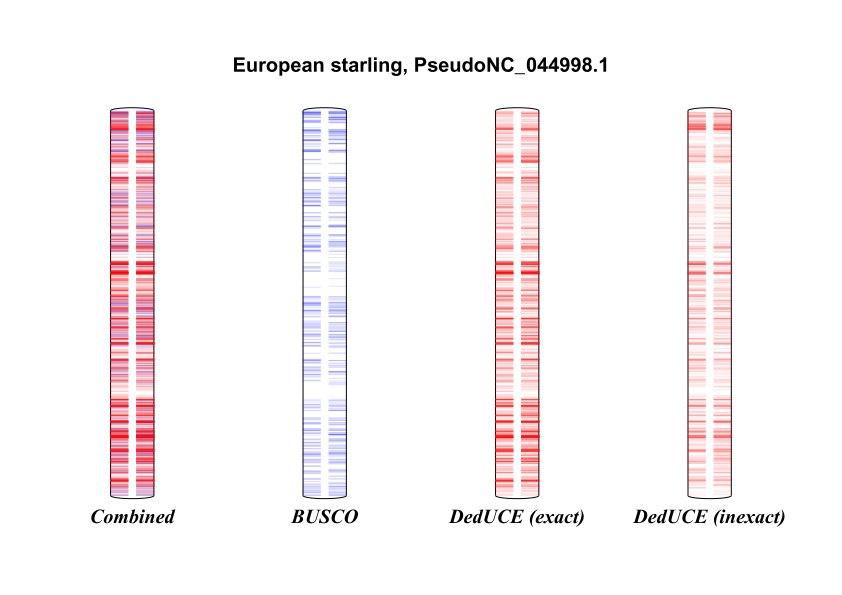

In [197]:
busco_seqs = pd.read_csv(os.path.join(data_dir, "starling", "busco", "starling.full.tdt"), delimiter="\t")
chr_seqs = busco_seqs[(busco_seqs.Genome  == "step8_pseudochromosomes") & (busco_seqs.Contig == "PseudoNC_044998.1_Taeniopygia_guttata_isolate_Blue55_chromosome_1,_bTaeGut2.pat.W.v2,_whole_genome_shotgun_sequence")]

features = [Bio.SeqFeature.SeqFeature(Bio.SeqFeature.FeatureLocation(int(x[6]),int(x[7]),strand=1 if x[8] == "+" else -1), qualifiers = {"color": ['rgba(0,0,255,0.1)']}) for x in chr_seqs.to_records()]

chr_diagram = BasicChromosome.Organism(output_format="png")
chr_diagram.page_size = (29.7*cm, 21*cm)

def draw_chr(length, name, features, tel_len=1000000, default_color='rgba(255,0,0,0.2)'):
    cur_chromosome = BasicChromosome.Chromosome(name)
    cur_chromosome.scale_num = length + 2 * tel_len


    start = BasicChromosome.TelomereSegment()
    start.scale = tel_len
    cur_chromosome.add(start)

    body = BasicChromosome.AnnotatedChromosomeSegment(length, features, default_feature_color=colors.toColor(default_color))
    body.scale = length
    cur_chromosome.add(body)

    end = BasicChromosome.TelomereSegment(inverted=True)
    end.scale = tel_len
    cur_chromosome.add(end)
    
    return cur_chromosome

#This chromosome is done
chr_diagram.add(draw_chr(length=126122027, name="Combined", features=features+deduce_exact_features+deduce_features))

chr_diagram.add(draw_chr(length=126122027, name="BUSCO", features=features))
chr_diagram.add(draw_chr(length=126122027, name="DedUCE (exact)", features=deduce_exact_features))
chr_diagram.add(draw_chr(length=126122027, name="DedUCE (inexact)", features=deduce_features))

chr_diagram.draw(os.path.join(constants.image_out_dir, "starlingchr.png"), "European starling, PseudoNC_044998.1")
Image(os.path.join(constants.image_out_dir, "starlingchr.png"))

#single_diagram = BasicChromosome.Organism(output_format="png")
#single_diagram.page_size = (29.7*cm, 21*cm)



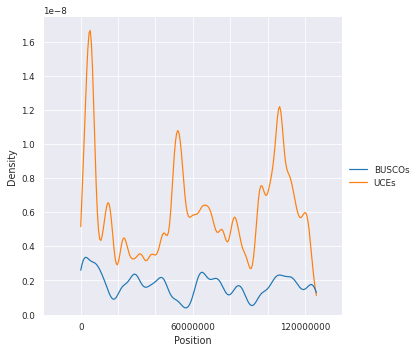

In [198]:
feature_location_df = pd.DataFrame.from_records(
    [{"type": "busco", "position": f.location.start} for f in features] +
        [{"type": "uce", "position": f.location.start} for f in deduce_features]

)
feature_location_df

pos_density = sns.displot(data=feature_location_df, x="position", hue="type", kind="kde",bw_adjust=.25, clip= (0.0, 126122027))
#pos_density.set(xlim=(0, None))
pos_density.set_xlabels("Position")
pos_density.set_xticklabels(["", 0, "", "", 60000000, "","",120000000,""])
pos_density._legend.set_title("")
pos_density._legend.texts[0].set_text("BUSCOs")
pos_density._legend.texts[1].set_text("UCEs")

pos_density.fig.savefig(os.path.join(constants.image_out_dir, "density.pdf"))


In [199]:
temp_dfs = []
for x in [50, 100, 200]:
    temp_df = pd.read_csv(os.path.join(data_dir, "canetoad", "completeness", f"deduce_comp_amphibian_{x}bp_100_minimap_9c8ec52.deduce.fa.csv"))
    temp_df["uce_size"] = x
    temp_dfs.append(temp_df)

cane_toad_deduce = pd.concat(temp_dfs)
cane_toad_deduce["alignment"] = cane_toad_deduce["alignment"].map(lambda x: x.replace(".fasta", ""))
cane_toad_deduce

,alignment,hit,exact_hit,miss,mm_mean,mm_median,mm_sd,mm_min,mm_max,mm_iqr,score_mean,score_median,score_sd,score_min,score_max,score_iqr,uce_size
0,canetoad.v2.2,61837,12957,34256,4.876369,3.0,6.460454,0,88,5.0,118.893591,108.0,40.895475,44,872,36.0,50
1,canetoad.v3.0.flye,62103,13184,33990,4.891277,3.0,6.495386,0,88,5.0,119.061623,108.0,40.829127,44,868,36.0,50
2,canetoad.v3.1.tidy,62168,13309,33925,4.884716,3.0,6.50079,0,88,5.0,119.033731,108.0,40.82229,44,868,36.0,50
3,canetoad.v3.2.hypo,62456,13353,33637,4.90366,3.0,6.572318,0,88,5.0,119.068848,108.0,40.90224,42,872,36.0,50
4,canetoad.v3.3.arcs,62455,13346,33638,4.908782,3.0,6.59203,0,88,5.0,119.075206,108.0,40.904509,42,872,36.0,50
5,canetoad.v3.4.sspace,62455,13318,33638,4.903947,3.0,6.577829,0,88,5.0,119.068065,108.0,40.908972,44,872,36.0,50
6,canetoad.v3.5.gapfinisher,62455,13300,33638,4.915187,3.0,6.59006,0,88,5.0,119.072772,108.0,40.905958,44,872,36.0,50
7,canetoad.v3.6.hypo,62458,13399,33635,4.908787,3.0,6.572035,0,88,5.0,119.072048,108.0,40.944493,44,872,36.0,50
8,canetoad.v3.7a.core,62595,13347,33498,4.886093,3.0,6.53071,0,88,5.0,119.024491,108.0,40.888252,44,872,36.0,50
9,canetoad.v3.7b.repeats,26192,4111,69901,9.450252,5.0,13.027884,0,129,12.0,102.918601,98.0,28.970761,46,442,30.0,50


In [200]:
cane_toad_completeness = pd.merge(cane_toad_buscomp, cane_toad_deduce, how="outer", left_on="Genome", right_on="alignment")
cane_toad_completeness = pd.merge(cane_toad_completeness, cane_toad_busco, how="outer", left_on="Genome", right_on="Genome", suffixes=(None, "_busco"))
cane_toad_completeness = cane_toad_completeness[~cane_toad_completeness["Genome"].isin(["canetoad.v3.7d.junk", "canetoad.v3.7b.repeats", "BUSCOMP"])]
cane_toad_completeness["deduce_hit_%"] = cane_toad_completeness["hit"] / (cane_toad_completeness["hit"] + cane_toad_completeness["miss"])
cane_toad_completeness["deduce_exact_%"] = cane_toad_completeness["exact_hit"] / (cane_toad_completeness["hit"] + cane_toad_completeness["miss"])
cane_toad_completeness["buscomp_complete_%"] = cane_toad_completeness["Complete"] / (cane_toad_completeness["N"])
cane_toad_completeness["busco_complete_%"] = cane_toad_completeness["Complete_busco"] / (cane_toad_completeness["N_busco"])

# cane_toad_fig, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize=(24,10))
# ax1.title.set_text("DedUCE exact UCE hits")
# ax2.title.set_text("BUSCOMP complete genes")

cane_toad_d_plot = sns.relplot(data=cane_toad_completeness, x="#", y="deduce_exact_%", hue="uce_size", kind="line")
cane_toad_bp_plot = sns.relplot(data=cane_toad_completeness, x="#", y="buscomp_complete_%", kind="line")
cane_toad_b_plot = sns.relplot(data=cane_toad_completeness, x="#", y="busco_complete_%", kind="line")
#cane_toad_plot.map(sns.lineplot, '#', 'busco_complete_%', ci=None)

NameError: name 'cane_toad_buscomp' is not defined

In [ ]:
sns.relplot(data=cane_toad_completeness[cane_toad_completeness.uce_size == 50], x="#", y="hit", kind="line")
sns.relplot(data=cane_toad_completeness[cane_toad_completeness.uce_size == 50], x="#", y="exact_hit", kind="line")


In [ ]:
print(cane_toad_completeness[cane_toad_completeness.uce_size == 50]["hit"].corr(cane_toad_completeness[cane_toad_completeness.uce_size == 50]["Complete"])
print(cane_toad_completeness[cane_toad_completeness.uce_size == 50]["hit"].corr(cane_toad_completeness[cane_toad_completeness.uce_size == 50]["Complete_busco"])

sns.relplot

In [ ]:
assembly_data["change_in_hit"] =assembly_data["hit"].diff()

assembly_data[assembly_data.Stage == "Gapfilling"][["Organism","Iteration", "Stage", "Tools", "hit","exact_hit", "change_in_hit", "Complete_busco"]]


In [ ]:
assembly_data[assembly_data.Organism == "starling"]["hit"].diff() / assembly_data[assembly_data.Organism == "starling"]["hit"].shift(-1) 

In [ ]:
assembly_data[assembly_data.Organism == "starling"]["Complete"].diff() / assembly_data[assembly_data.Organism == "starling"]["Complete"].shift(-1) 